CPT Resonance

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# Initial values
p11, p22, p33 = 0.5, 0.5, 0
p12, p13, p23 = 0.5, 0, 0
w1, w2 = 0.25,0.25
d1, d2 = 0, 0
g31, g32 = 0.05, 0.05

P0 = np.array([p11, p22, p12, p13, p23], dtype='complex')

In [4]:
# eoms

'''
P[0] = p11
P[1] = p22
P[2] = p12
P[3] = p13
P[4] = p23
'''

def dP_dt(t, P):
    Pt = np.zeros(5, dtype='complex')
    Pt[0] = 1j * w1 * (np.conj(P[3])-P[3]) + g31*(1-P[0]-P[1])
    Pt[1] = 1j * w2 * (np.conj(P[4])-P[4]) + g32*(1-P[0]-P[1])
    Pt[2] = 1j * ((d1+d2)*P[2] + w1*np.conj(P[4]) - w2*P[3])
    Pt[3] = 1j * (d1*P[3] + w1*(1-P[1]-2*P[0]) - w2*(P[2]))
    Pt[4] = 1j * (-1*d2*P[4] + w2*(1-P[0]-2*P[1]) - w1*np.conj(P[2]))
    return Pt


In [46]:
# integrate
tmax = 200
tspan = (0,tmax)

result = solve_ivp(dP_dt, tspan, P0, first_step=0.01, max_step=0.1)
p11f = result.y[0]
p22f = result.y[1]
p12 = result.y[2]
p33 = 1-(p11f+p22f)


p1and2 = np.add(p11f, p22f)
p33f = np.subtract(np.ones(len(p11f)), p1and2)

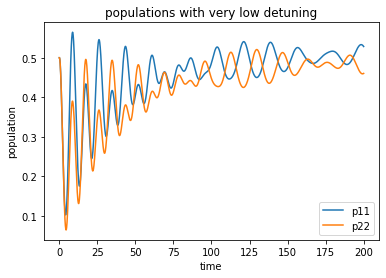

In [47]:
tarr = np.linspace(0,tmax,num=len(p11f))

plt.xlabel('time')
plt.ylabel('population')
plt.title('populations with very low detuning')
plt.plot(tarr, p11f.real)
plt.plot(tarr, p22f.real)
plt.legend(['p11', 'p22'])

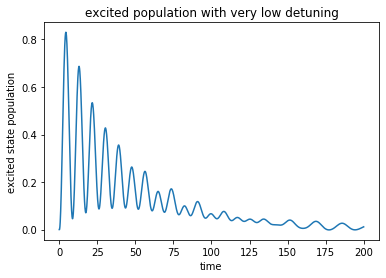

In [48]:
plt.xlabel('time')
plt.ylabel('excited state population')
plt.title('excited population with very low detuning')
plt.plot(tarr, p33f.real)

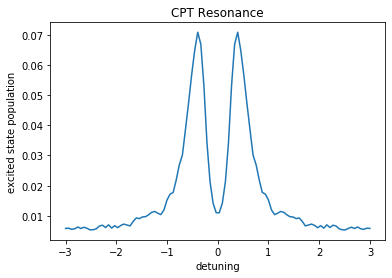

In [49]:
d1, d2 = 3, 0
n = 100
d1_0 = np.linspace(-1*d1, d1, num=n)
p33_avg = np.zeros(n)
for i in range(n):
    d1 = d1_0[i]
    result = solve_ivp(dP_dt, tspan, P0, first_step=0.25, max_step=0.5)
    p11f = result.y[0]
    p22f = result.y[1]
    p1and2 = np.add(p11f, p22f)
    p33f = np.subtract(np.ones(len(p11f)), p1and2)
    last = p33f[int(len(p33f)*0.6):]
    p33_avg[i] = sum(last.real)/len(last)

plt.xlabel("detuning")
plt.ylabel("excited state population")
plt.title('CPT Resonance')
plt.plot(d1_0, p33_avg.real)